<a href="https://colab.research.google.com/github/hiidenpelto/data_science/blob/master/Dados_consumidor_gov_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados da Plataforma Consumidor.gov.br

Com o objetivo de promover a resolução alternativa dos conflitos, desafogando dessa forma o já abarrotado sistema judiciário e promovendo uma solução mais rápida dos problemas existentes entre consumidores e empresas, criou-se a plataforma `Consumidor.gov.br`. Esse serviço público é monitorado pelos órgãos de defesa do consumidor, juntamente com a Secretaria Nacional do Consumidor do Ministério da Justiça.

![Consumidor.gov.br](https://www.novo.justica.gov.br/news/portaria-determina-cadastro-de-empresas-na-plataforma-consumidor-gov.br/consumidor-gov-br.jpeg/@@images/cee38baf-e337-427c-9740-8db5908f4bd4.jpeg)

Assim, foi inaugurado um espaço onde é promovido o diálogo entre consumidores e empresas de diversos nichos econômicos de forma voluntária e participativa, possibilitando o alcance de um desfecho benéfico a ambas as partes.

Partindo dessas premissas, necessário se faz realizar uma exploração dos dados da mencionada plataforma, possibilitando a compreensão de como está sendo utilizada e se suas finalidades estão sendo atingidas.

Os dados foram obtidos no [Portal Brasileiro de Dados Abertos](http://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1), onde estão armazenados os dados da plataforma consumidor.gov.br do ano de 2014 ao ano de 2019.


## Importando o Dataset

Os dados da plataforma referente ao ano de 2019 estão divididos em dois arquivos `csv` diferentes, sendo cada um correspondente a um semestre do ano.

Para importar tais *datasets* e transformá-los em DataFrames, permitindo a manipulação de suas variáveis e entradas, é necessário importar a biblioteca pandas. Aproveitando o ensejo, será realizada a importação das demais bibliotecas necessárias para serem construídos os gráficos da análise.

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Os dados serão do [1º semestre](http://dados.mj.gov.br/dataset/0182f1bf-e73d-42b1-ae8c-fa94d9ce9451/resource/f378cd96-ad84-4da3-97b0-668714711faa/download/2019-1-semestre.csv) e do [2º semestre](http://dados.mj.gov.br/dataset/0182f1bf-e73d-42b1-ae8c-fa94d9ce9451/resource/82eeda37-0264-48c1-9711-0752abf7df5b/download/2019--2-semestre.csv) foram upados no Google Colab, facilitando a importação e a transformação deles em DataFrames pela biblioteca pandas.

Foram criados dois DataFrames distintos para cada semestre; mais adiante, contudo, serão eles unidos para facilitar a exploração e análise.

In [2]:
# importar o dataset do primeiro semestre de 2019
df1 = pd.read_csv("/content/2019-1-semestre.csv", error_bad_lines=False, encoding='latin1', sep=";")

In [3]:
# importar o dataset do segundo semestre de 2019
df2 = pd.read_csv("/content/2019--2-semestre (1).csv", error_bad_lines=False, encoding='latin1', sep=';')

## Dicionário de Dados

Através do Dicionário de Dados, ficará fácil para o leitor saber o significado de cada variável presente no DataFrame.

* `Região`: Sigla da região geográfica do consumidor reclamante;
* `UF`: Sigla do estado do consumidor reclamante;
* `Cidade`: Município do consumidor reclamante;
* `Sexo`: Sigla do sexo do consumidor reclamante; 
* `Faixa Etária`: Faixa etária do consumidor;
* `Data Finalização`: Data de finalização da reclamação;
* `Tempo Resposta`: Número de dias para a resposta da reclamação, desconsiderando o tempo que a reclamação tenha ficado em análise pelo gestor;
* `Nome Fantasia`: Nome pelo qual a empresa reclamada é conhecida pelo mercado; 
* `Segmento de mercado`: Principal segmento de mercado da empresa participante;
* `Área`: Área à qual percente o assunto objeot da reclamação;
* `Assunto`: Assunto objeto da reclamação;
* `Grupo Problema`: Agrupamento do qual faz parte o problema classificado na reclamação;
* `Problema`: Descrição do problema objeto da reclamação;
* `Como Comprou Contratou`: Descrição do meio utilizado para contratação/aquisição do produto ou serviço reclamado;
* `Procurou Empresa`: Sigla da resposta do consumidor à pergunta: "Procurou a empresa para solucionar o problema?"
* `Respondida`: Sigla que indica se a empresa respondeu à reclamação ou não;
* `Situação`: Situação atual da reclamação no sistema;
* `Avaliação Reclamação`: Classificação atribuída pelo consumidor sobre o desfecho da reclamação;
* `Nota do Consumidor`: Número da nota de 1 a 5 atribuída pelo consumidor ao atendimento da empresa;
* `Total`: Contador de reclamações (totalizador para facilitar o uso dos dados em tabela dinâmica).


## Análise Exploratória dos Dados

A Análise Exploratória servirá para serem obtidas algumas informações iniciais acerca do DataFrame, como a quantidade de entradas e variáveis, os tipos dos dados nele presentes, quantos dados nulos existem, etc.

Antes disso, contudo, os nomes das colunas de ambos os DataFrames serão modificados, com o intuito de facilitar a manipulação. A designação do mesmo nome para as variáveis possibilitará a reunião futura desses DataFrames.

In [4]:
# modificar o nome das colunas
df1.columns = ['regiao', 'uf', 'cidade', 'sexo', 'faixa_etaria', 'data_finalizacao', 'tempo_resposta', 'nome_fantasia', 'segmento_mercado', 'area', 'assunto', 'grupo_problema', 'problema', 'como_comprou', 'procurou_empresa', 'respondida', 'situacao', 'avaliacao_reclamacao' ,'nota_consumidor', 'total']

In [5]:
# modificar o nome das colunas
df2.columns = ['regiao', 'uf', 'cidade', 'sexo', 'faixa_etaria', 'data_finalizacao', 'tempo_resposta', 'nome_fantasia', 'segmento_mercado', 'area', 'assunto', 'grupo_problema', 'problema', 'como_comprou', 'procurou_empresa', 'respondida', 'situacao', 'avaliacao_reclamacao' ,'nota_consumidor', 'total']

Agora veremos a quantidade de entradas e variáveis existentes em cada um dos DataFrames.

In [6]:
# ver a quantidade de entradas de ambos os DataFrames
print("Número de entradas do df1:", df1.shape[0])
print("Número de entradas df2:", df2.shape[0])
print("Número de variáveis do df1:", df1.shape[1])
print("Número de variáveis do df2:", df2.shape[1])

Número de entradas do df1: 356788
Número de entradas df2: 423391
Número de variáveis do df1: 20
Número de variáveis do df2: 20


Nota-se que os dois *datasets* são bem extensos, possuindo centenas de milhares de entradas cada um. Isso já demonstra que tal ferramenta de resolução dos conflitos consumeristas está sendo bastante requisitada pelos consumidores.

Unificaremos neste momento os DataFrames, possibilitando uma manipulação mais facilitada dos dados da plataforma Consumidor.org.br de todo o ano de 2019. Após isso, veremos a quantidade de entradas e variáveis desse novo DataFrame.

In [7]:
# unificar os DataFrames do primeiro e segundo semestre de 2019
df = df1.merge(df2, how='outer')

# ver o formato do DataFrame unificado
print("Número de entradas:", df.shape[0])
print("Número de variáveis:", df.shape[1])

Número de entradas: 780179
Número de variáveis: 20


Feitas as manipulações iniciais, teremos um primeiro contato com o DataFrame através da função `pd.head()`. Ela retornará as primeiras 5 entradas existentes em cada variável, permitindo enxegarmos como algumas informações estão dispostas.

In [8]:
# ver as 5 primeiras entradas do DataFram unificado
df.head()

,regiao,uf,cidade,sexo,faixa_etaria,data_finalizacao,tempo_resposta,nome_fantasia,segmento_mercado,area,assunto,grupo_problema,problema,como_comprou,procurou_empresa,respondida,situacao,avaliacao_reclamacao,nota_consumidor,total
0,SE,SP,Francisco Morato,M,entre 21 a 30 anos,04/01/2019,10.0,Banco do Brasil,"Bancos, Financeiras e Administradoras de CartÃ£o",ServiÃ§os Financeiros,Conta corrente / SalÃ¡rio / PoupanÃ§a /Conta A...,VÃ­cio de Qualidade,Dificuldade para alterar/ ativar serviÃ§os,Telefone,S,S,Finalizada nÃ£o avaliada,NÃ£o Avaliada,NaN,1
1,S,RS,Porto Alegre,F,entre 61 a 70 anos,01/01/2019,10.0,Mercado Pago,Empresas de Pagamento EletrÃ´nico,ServiÃ§os Financeiros,ServiÃ§o de pagamento online/ via celular/ maq...,Atendimento / SAC,Dificuldade de contato / demora no atendimento,Internet,S,S,Finalizada nÃ£o avaliada,NÃ£o Avaliada,NaN,1
2,SE,SP,SÃ£o Vicente,F,entre 41 a 50 anos,03/01/2019,9.0,Banco do Brasil,"Bancos, Financeiras e Administradoras de CartÃ£o",ServiÃ§os Financeiros,CartÃ£o de CrÃ©dito / CartÃ£o de DÃ©bito / Car...,Contrato / Oferta,Oferta nÃ£o cumprida / serviÃ§o nÃ£o fornecido...,Internet,N,S,Finalizada nÃ£o avaliada,NÃ£o Avaliada,NaN,1
3,NE,PE,Paulista,M,entre 31 a 40 anos,02/01/2019,10.0,Banco do Brasil,"Bancos, Financeiras e Administradoras de CartÃ£o",ServiÃ§os Financeiros,Conta corrente / SalÃ¡rio / PoupanÃ§a /Conta A...,Contrato / Oferta,Dificuldade para contratar / recusa injustificada,NÃ£o comprei / contratei,S,S,Finalizada nÃ£o avaliada,NÃ£o Avaliada,NaN,1
4,SE,SP,SÃ£o Bernardo do Campo,F,entre 31 a 40 anos,02/01/2019,7.0,Banco ItaÃº Unibanco,"Bancos, Financeiras e Administradoras de CartÃ£o",ServiÃ§os Financeiros,CrÃ©dito Consignado (EmprÃ©stimo descontado em...,CobranÃ§a / ContestaÃ§Ã£o,"CÃ¡lculo de juros, saldo devedor (contestaÃ§Ã£...",NÃ£o comprei / contratei,S,S,Finalizada nÃ£o avaliada,NÃ£o Avaliada,NaN,1


Somente as 5 primeiras entradas já nos dão um panorama do que deveremos enfrentar na nossa análise. Percebemos, por exemplo, que a coluna `nota_consumidor` está com diversas entradas nulas, algo que deverá ser enfrentado futuramente, quando formos explorar a quantidade de dados nulos.

Através do `pd.dtypes` saberemos quais são os tipos de dados existentes no DataFrame.

In [9]:
# ver o tipo das variáveis
df.dtypes

regiao                   object
uf                       object
cidade                   object
sexo                     object
faixa_etaria             object
data_finalizacao         object
tempo_resposta          float64
nome_fantasia            object
segmento_mercado         object
area                     object
assunto                  object
grupo_problema           object
problema                 object
como_comprou             object
procurou_empresa         object
respondida               object
situacao                 object
avaliacao_reclamacao     object
nota_consumidor         float64
total                     int64
dtype: object

A grande maioria dos dados estão no formato `object`. Como a grande maioria das colunas possuem dados categóricos em suas entradas, isso não é um problema; com exceção da coluna `data_finalizacao`, a qual deverá ser transformada no tipo `datetime`.

In [10]:
# transformar a variavél data_finalizacao para o formato datetime
df.data_finalizacao = pd.to_datetime(df.data_finalizacao)

Em seguida veremos qual é a porcentagem de dados nulos presente no DataFrame. Dependendo da quantidade de valores nulos, será necessário removermos ou preenchermos essas ausências.

In [11]:
# percentual de valores nulos em cada variável
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

nota_consumidor         0.439083
tempo_resposta          0.010799
total                   0.000000
uf                      0.000000
cidade                  0.000000
sexo                    0.000000
faixa_etaria            0.000000
data_finalizacao        0.000000
nome_fantasia           0.000000
segmento_mercado        0.000000
area                    0.000000
assunto                 0.000000
grupo_problema          0.000000
problema                0.000000
como_comprou            0.000000
procurou_empresa        0.000000
respondida              0.000000
situacao                0.000000
avaliacao_reclamacao    0.000000
regiao                  0.000000
dtype: float64

`tempo_resposta` possui um valor irrisório de 1% de valores nulos. Já a variável `nota_consumidor` está com quase 44% de seus dados ausentes. Para realizarmos uma análise mais acurada, criaremos uma cópia do DataFrame chamada `df_clean`, onde serão removidos todas as entradas com valores nulos.

Utilizaremos esse novo DataFrame mais adiante.

In [12]:
# definir um novo DataFrame, onde os valores nulos serão excluídos
df_clean = df.copy()

In [13]:
# dropar os valores ausentes 
df_clean.dropna(axis=0, inplace=True)

Finalizando a análise exploratória, visualizaremos algumas características estatísticas do DataFrame através da função `pd.describe()`. Como somente 3 variáveis possuem valores de `integers` e `floats`, somente serão plotadas as estatísticas dessas 3 colunas.

In [14]:
# resumo estatístico do DataFrame
df.describe()

,tempo_resposta,nota_consumidor,total
count,771754.000000,437616.000000,780179.0
mean,6.540118,3.283397,1.0
std,3.263325,1.730530,0.0
min,0.000000,1.000000,1.0
25%,4.000000,1.000000,1.0
50%,7.000000,4.000000,1.0
75%,9.000000,5.000000,1.0
max,15.000000,5.000000,1.0


Na variável `tempo_resposta` encontramos as seguintes informações:
* O tempo médio para as empresas responderem aos consumidores é de 6,5 dias;
* Apenas 25% das respostas passaram de 9 dias para serem dadas;
* O máximo de tempo para as empresas darem uma resposta foi de 15 dias.

Percebemos que o tempo de resposta no geral é satisfatório. Sabemos que a quantidade de reclamações recebidas por grandes empresas é bastante elevado - só nessa plataforma foram cerca de 780.000 apenas em 2019 -, dificultando um pronto-atendimento às queixas do consumidor. Apesar disso, metade das reclamações foram respondidas em uma semana.

Na variável `nota_consumidor` revelaram-se os seguintes dados estatísticos:
* A média da nota dada pelos consumidores foi de 3,2 pontos;
* Metade das notas foram de 4 pontos;
* Apenas 25% das notas foram de 5 pontos.

As notas dispostas pelos consumidores revelam que a resolução das queixas dos consumidores está ainda em um nível insuficiente. As empresas devem tomar medidas, portanto, para elevar a satisfação de seus clientes ao máximo possível, aumentando a probabilidade deles voltarem a contratarem seus serviços ou comprarem seus produtos.

## Análise Gráfica dos Dados

Realizada a Análise Exploratória, o passo seguinte é alguns gráficos serem plotados e ver quais *insights* poderão ser obtidos deles.



O primeiro gráfico a ser plotado será referente aos 6 estados com a maior porcentagem de consumidores que deram entrada na plataforma. Para isso definiremos o DataFrame `df_uf` com esses valores.

In [15]:
# criação do DataFrame com os 6 estados com a maior porcentagem de consumidores
df_uf = (df['uf'].value_counts() / df.shape[0])[0:6].copy()

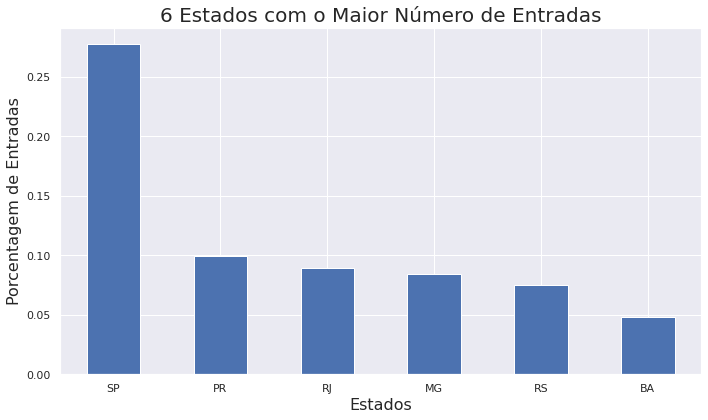

In [16]:
# gráfico de barras para os 6 estados com maior número de entradas
sns.set()
fig, ax = plt.subplots(figsize=(10, 6))
df_uf.plot(kind="bar", ax=ax)
ax.set_xlabel("Estados", fontsize=16)
ax.set_ylabel("Porcentagem de Entradas", fontsize=16)
ax.set_title("6 Estados com o Maior Número de Entradas", fontsize=20)
plt.xticks(rotation=0)
plt.tight_layout()

Mais de 1/4 das reclamações se originaram do estado de São Paulo. Isso se deve tanto ao fato desse estado ser o mais populoso do país quanto ao fato de seus habitantes possuírem um maior poder de compra e, consequentemente, consumirem mais.

Dos 6 estados com maior número de entradas, 3 são do Sudentes e 2 são do Sul, sendo o 6º colocado o estado da Bahia, na região Nordeste.


O próximo gráfico a ser plotado será referente à faixa etária dos consumidores que ingressaram com reclamações na plataforma.


In [17]:
# DataFrame com a quantidade de entradas da variável faixa_etaria
df_etaria = df['faixa_etaria'].value_counts().copy()

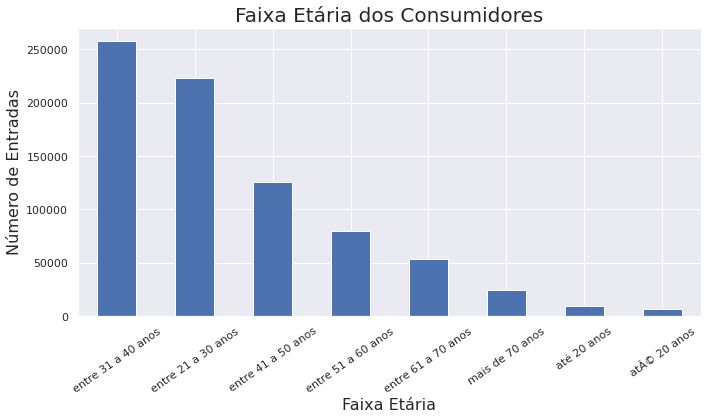

In [18]:
# gráfico de barras da faixa etária dos consumidores
fig, ax = plt.subplots(figsize=(10,6))
df_etaria.plot(kind='bar', ax=ax)
ax.set_title("Faixa Etária dos Consumidores", fontsize=20)
ax.set_xlabel("Faixa Etária", fontsize=16)
ax.set_ylabel("Número de Entradas", fontsize=16)
plt.xticks(rotation=35)
plt.tight_layout()

Vemos que a grande maioria dos consumidores possuem entre 21 e 40 anos. O apontamento não poderia ser outro, tendo em vista que a população nessa idade representa a maioria da população e estão mais conectados à internet, utilizando desses tipos de plataformas para resolver problemas consumeristas.

Através do gráfico de Waffle, poderemos ter uma noção visual da quantidade de consumidores do sexo masculino e do sexo feminino. Para isso, instalaremos a biblioteca `pywaffle`.

In [19]:
# instalar a biblioteca pywaffle
!pip install pywaffle -q

#importar o pacote Waffle
from pywaffle import Waffle

     |████████████████████████████████| 532kB 2.8MB/s 


In [20]:
# DataFrame com a quantidade de entradas de cada sexo
df_sexo = df['sexo'].value_counts().to_dict().copy()

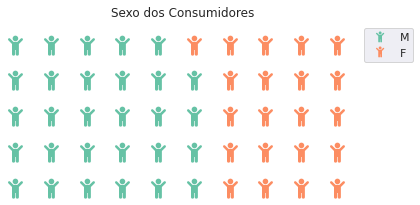

In [21]:
# ver o gráfico de waffle para o sexo dos consumidores
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    columns=10,
    values=df_sexo,
    title={'label': 'Sexo dos Consumidores', 'loc': 'center'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    icons='child',
    font_size=20,
    icon_legend=True
)

Vemos que a maioria dos consumidores que deram entrada em reclamações na plataforma são do sexo masculino.

Agora veremos as 5 empresas campeãs de reclamações.

In [22]:
# Criação do DataFrame com as 5 empresas com o maior número de entradas
df_empresa = df['nome_fantasia'].value_counts()[0:5].copy()

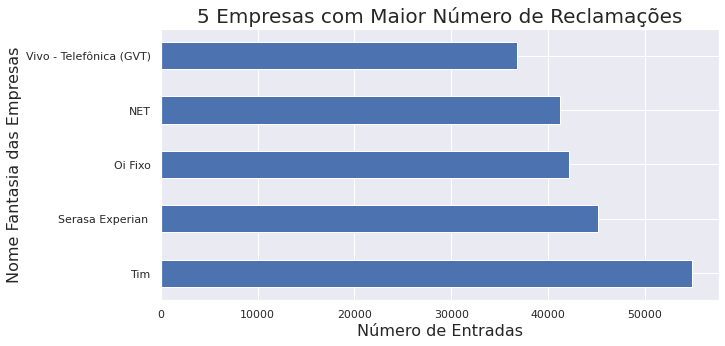

In [23]:
# gráfico de barras das 5 empresas com o maior número de reclamações
fig, ax = plt.subplots(figsize=(10,5))
df_empresa.plot(kind='barh', ax=ax)
ax.set_title('5 Empresas com Maior Número de Reclamações', fontsize=20)
ax.set_xlabel('Número de Entradas', fontsize=16)
ax.set_ylabel('Nome Fantasia das Empresas', fontsize=16)
plt.show()

Das 5 empresas com o maior número de reclamações, 4 delas são do segmento de telefonia e internet. Todos sabemos como esse tipo de serviço é realizado de forma bastante insatisfatória, ocasionando inúmeras dores de cabeça aos consumidores.

Outra que não poderia estar fora desse ranking é a Serasa Experian; quem é da área jurídica sabe a elevada quantidade negativações indevidas sofridas pelos cidadãos decorrentes de fraudes ou enganos.

Um gráfico que não poderia ficar de fora da análise é do número de reclamações que foram respondidas pelas empresas.

Text(0, 0.5, 'Quantidade de Entradas')

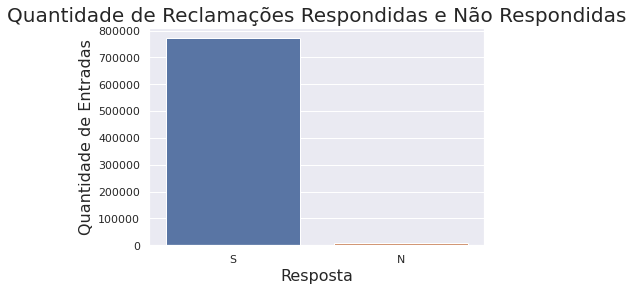

In [24]:
# gráfico de barras para a quantidade de reclamações respondidas
fig, ax = plt.subplots()
sns.countplot(df['respondida'], ax=ax);
ax.set_title("Quantidade de Reclamações Respondidas e Não Respondidas", fontsize=20)
ax.set_xlabel("Resposta", fontsize=16)
ax.set_ylabel("Quantidade de Entradas", fontsize=16)

Percebe-se a eficácia da plataforma em estabelecer uma comunicação entre os consumidores e as empresas para a resolução dos conflitos consumeristas. A taxa de reclamaçãos não respondidas é absolutamente irrisória, tendo a avassaladora maioria das queixas dos consumidores obtido um retorno.

Na Análise Exploratória vimos algumas estatísticas relacionadas ao tempo de resposta, como o tempo médio que as empresas demoraram para dar um retorno aos seus clientes.

Para observarmos melhor essa varíavel, devemos plotar um histograma, permitindo visualizarmos a relação entre a quantidade de entradas e a quantidade de tempo dispendido para se obter uma resposta.

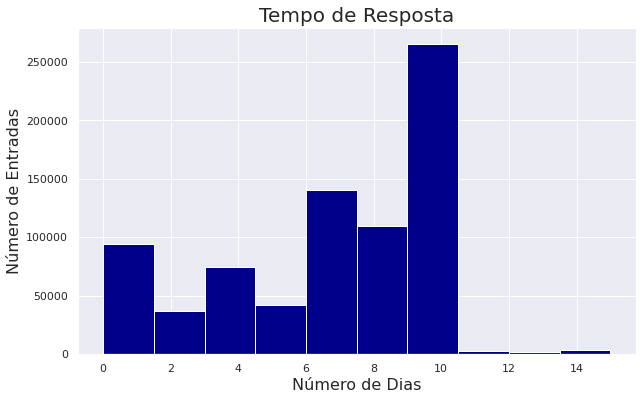

In [25]:
# histograma do tempo de resposta
fig, ax = plt.subplots(figsize=(10,6))
df.hist('tempo_resposta', color='darkblue', ax=ax)
ax.set_title('Tempo de Resposta', fontsize=20)
ax.set_xlabel('Número de Dias', fontsize=16)
ax.set_ylabel('Número de Entradas', fontsize=16)
plt.show()

O histograma revela ter a resposta à maior parte das reclamações se dado entre 6 e 10 dias, evidenciando um tempo satisfatório de retorno. Pouquíssimas respostas se deram acima de 10 dias, enquanto um percentual elevado ficaram entre 0 e 2 dias.

Outro histograma revelador e, portanto, importante de ser plotado é relativo ao retorno dado pelos consumidores quanto a resolução de seus problemas. Por isso, veremos o histograma da variável `nota_consumidor`.

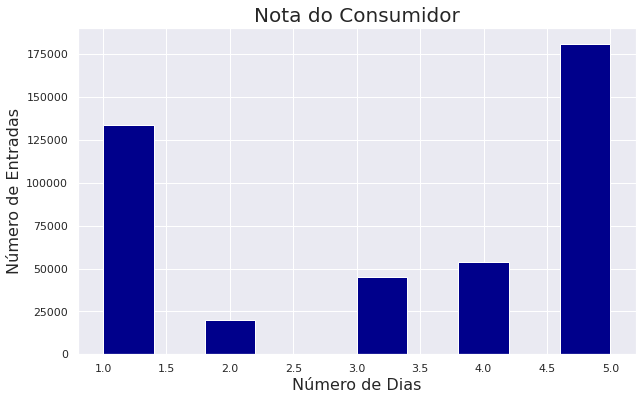

In [32]:
# histograma da variável nota_consumidor
fig, ax = plt.subplots(figsize=(10,6))
df_clean.hist('nota_consumidor', color='darkblue', ax=ax)
ax.set_title('Nota do Consumidor', fontsize=20)
ax.set_xlabel('Número de Dias', fontsize=16)
ax.set_ylabel('Número de Entradas', fontsize=16)
plt.show()

Os extremos do gráfico revelam importantes informações: apesar de boa parte dos consumidores terem dado nota máxima ao atendimento, significativa parte deles deram a menor nota possível. Assim, devem as empresas terem noção de tais dados para buscar tornar mais satisfatório o uso da plataforma.

Na plataforma Consumidor.gov.br os consumidores inserem o assunto da reclamação no momento de registrá-la no sistema. Esses dados podem nos dar uma noção de quais são os assuntos mais recorrentes presentes nas queixas.

Como são dados inseridos em formato `string`, utilizaremos a biblioteca `WordCloud` para gerar excluir as palavras desnecessárias e geramos um gráfico das palabras mais recorrentes no DataFrame.

Primeiramente serão excluídos todos os espaços entre as palavras presentes na coluna `assunto` e contabilizaremos quantas palavras existem na mesma.

In [27]:
assunto = ' '.join(s for s in df_clean['assunto'])

print("Quantidade de palavras", format(len(assunto)))

Quantidade de palavras 16993940


Em seguida serão estabelecidas as palavras que serão excluídas, bem como geraremos o gráfico das palavras mais recorrentes na mencionada variável.

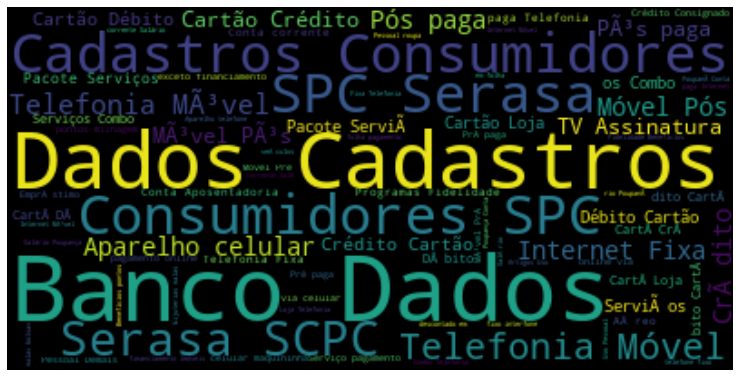

In [28]:
# WordCloud das palavras mais recorrentes
stopwords = set(STOPWORDS)
stopwords.update(['de', 'etc', 'por'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(assunto)

fig, ax = plt.subplots(figsize=(13,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

A WordCloud acima reforça o *insight* obtido da análise das 5 empresas mais demandadas na plataforma: cadastro de inadimplentes e serviços de telefonia e internet são os campeões de reclamações dos usuários.

Além de expressões como "Banco de Dados", "Serasa SPC", "Telefonia Móvel" e "Internet Fixa", palavras em destaque como "Cartão de Crédito", "Cartão de Loja" e "Conta Corrente" demonstram que uma boa parte dos usuários tiveram problemas com bancos e operadoras de cartões.

Na coluna `problema` aparecem as palavras descritas pelos consumidores como motivos ensejadores das reclamações.

Também plotaremos uma WordCloud para essa variável.

In [29]:
problema = ' '.join(s for s in df_clean['problema'])

print("Quantidade de palavras", format(len(problema)))

Quantidade de palavras 29675287


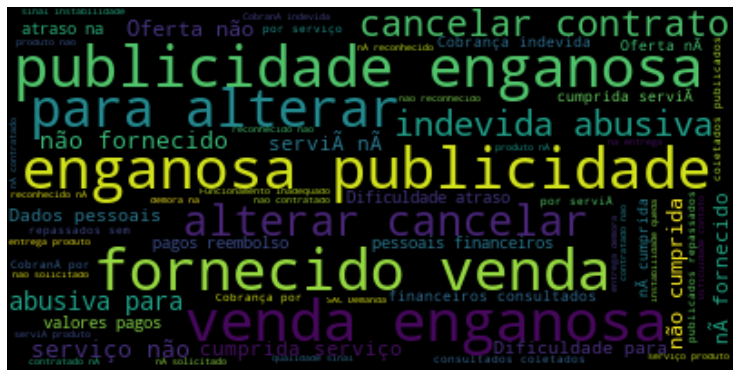

In [30]:
stopwords = set(STOPWORDS)
stopwords.update(['de', 'ou'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(problema)

fig, ax = plt.subplots(figsize=(13,8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

A rainha inconteste das reclamações é a "Publicidade Enganosa". Temos também recorrentes entradas de consumidores que tiveram problemas em cancelar contratos, com cobranças indevidas e com vendas enganosas por parte das empresas.

# Conclusão

Inúmeros fatores podem ser apontados como responsáveis pelo aumento vertiginoso do consumo pela população brasileira. Alguns apontam a ascenção de um número cada vez maior de famílias à classe média e o aumento do poder de consumo dessa esfera social como fator preponderante; enquanto outros podem culpar o estimulo das empresas e da sociedade ao consumismo desenfreado e incosciente, juntamente com a obsolescência programada dos produtos.

Independetemente das causas e apesar das diversas contribuições econômicas e sociais desse comportamento, uma das consequências mais prejudiciais à sociedade é o abarrotamento gradativo sofrido pelo judiciário de causas envolvendo as relações de consumo. Isso acarreta em um direcionamento cada vez maior de recursos financeiros e humanos para essa área, quando poderiam ser empregados em outros segmentos.

A plataforma Consumidor.gov.br veio como uma alternativa extremamente válida para a resolução desses conflitos, conectando de forma facilitada consumidores e empresas. Como vimos ao longo dessa análise, tal ferramenta vem obtendo uma adesão considerável e resolvendo de forma satisfatória os imbróglios, com as empresas respondendo aos consumidores em um período curto de tempo e com uma taxa de aprovação razoavelmente agradável.
